# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    # f"{url}{cities}&APPID={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | swakopmund
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | amravati
Processing Record 8 of Set 1 | varde
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | puerto maldonado
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 16 of Set 1 | saudarkrokur
Processing Record 17 of Set 1 | chibougamau
Processing Record 18 of Set 1 | lauro de freitas
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | loukhi
Processing Record 21 of Set 1 | volchansk
Processing

In [5]:
print(city_data)

[{'City': 'longyearbyen', 'Lat': 78.2186, 'Lng': 15.6401, 'Max Temp': -22.09, 'Humidity': 71, 'Cloudiness': 20, 'Wind Speed': 0, 'Country': 'SJ', 'Date': 1712449836}, {'City': 'carnarvon', 'Lat': -24.8667, 'Lng': 113.6333, 'Max Temp': 25.26, 'Humidity': 58, 'Cloudiness': 0, 'Wind Speed': 7.37, 'Country': 'AU', 'Date': 1712450016}, {'City': 'swakopmund', 'Lat': -22.6833, 'Lng': 14.5333, 'Max Temp': 14.43, 'Humidity': 81, 'Cloudiness': 1, 'Wind Speed': 1.34, 'Country': 'NA', 'Date': 1712450016}, {'City': 'utrik', 'Lat': 11.2278, 'Lng': 169.8474, 'Max Temp': 27.02, 'Humidity': 75, 'Cloudiness': 100, 'Wind Speed': 8.87, 'Country': 'MH', 'Date': 1712449843}, {'City': 'vorgashor', 'Lat': 67.5833, 'Lng': 63.95, 'Max Temp': -9.55, 'Humidity': 93, 'Cloudiness': 100, 'Wind Speed': 7.14, 'Country': 'RU', 'Date': 1712449957}, {'City': 'huarmey', 'Lat': -10.0681, 'Lng': -78.1522, 'Max Temp': 23.08, 'Humidity': 84, 'Cloudiness': 97, 'Wind Speed': 5.36, 'Country': 'PE', 'Date': 1712449782}, {'City': 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-22.09,71,20,0.00,SJ,1712449836
1,carnarvon,-24.8667,113.6333,25.26,58,0,7.37,AU,1712450016
2,swakopmund,-22.6833,14.5333,14.43,81,1,1.34,NA,1712450016
3,utrik,11.2278,169.8474,27.02,75,100,8.87,MH,1712449843
4,vorgashor,67.5833,63.9500,-9.55,93,100,7.14,RU,1712449957


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-22.09,71,20,0.00,SJ,1712449836
1,carnarvon,-24.8667,113.6333,25.26,58,0,7.37,AU,1712450016
2,swakopmund,-22.6833,14.5333,14.43,81,1,1.34,NaN,1712450016
3,utrik,11.2278,169.8474,27.02,75,100,8.87,MH,1712449843
4,vorgashor,67.5833,63.9500,-9.55,93,100,7.14,RU,1712449957


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

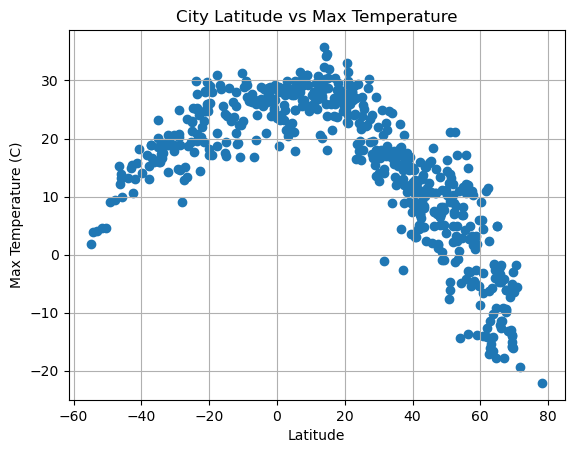

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

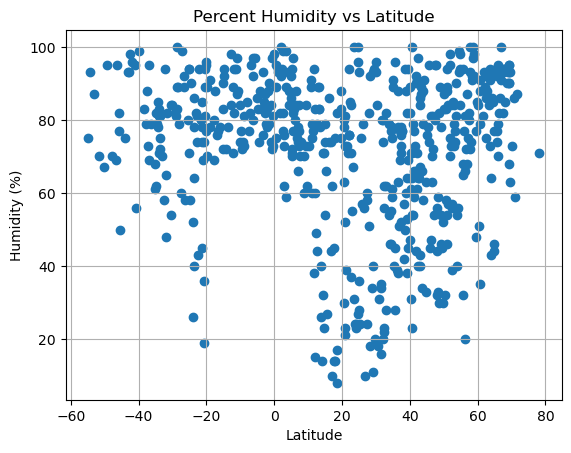

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Percent Humidity vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

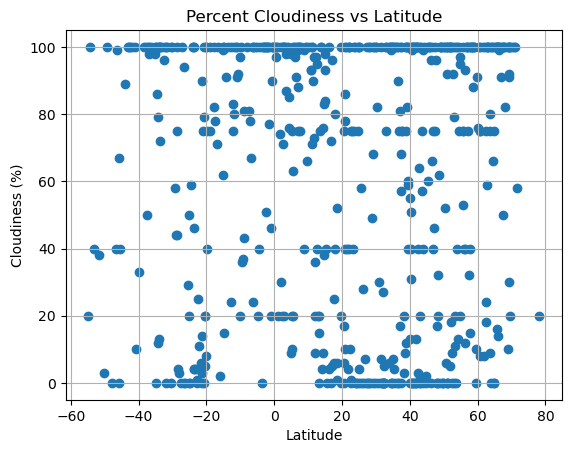

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Percent Cloudiness vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

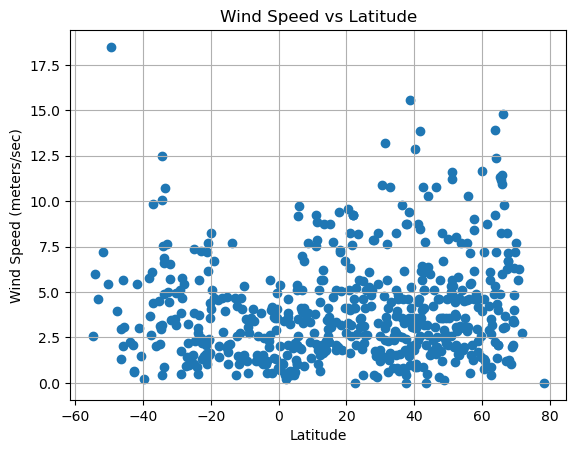

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters/sec)")
plt.title("Wind Speed vs Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression:


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-22.09,71,20,0.00,SJ,1712449836
3,utrik,11.2278,169.8474,27.02,75,100,8.87,MH,1712449843
4,vorgashor,67.5833,63.9500,-9.55,93,100,7.14,RU,1712449957
6,amravati,20.9333,77.7500,29.15,23,86,1.62,IN,1712449938
7,varde,55.6211,8.4807,17.09,68,75,7.72,DK,1712450016


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,25.26,58,0,7.37,AU,1712450016
2,swakopmund,-22.6833,14.5333,14.43,81,1,1.34,NaN,1712450016
5,huarmey,-10.0681,-78.1522,23.08,84,97,5.36,PE,1712449782
8,edinburgh of the seven seas,-37.0676,-12.3116,18.95,95,98,9.83,SH,1712450017
9,port-aux-francais,-49.3500,70.2167,9.06,95,100,18.49,TF,1712450017


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation: y=-0.59x + 34.65
The r-value is:-0.886467


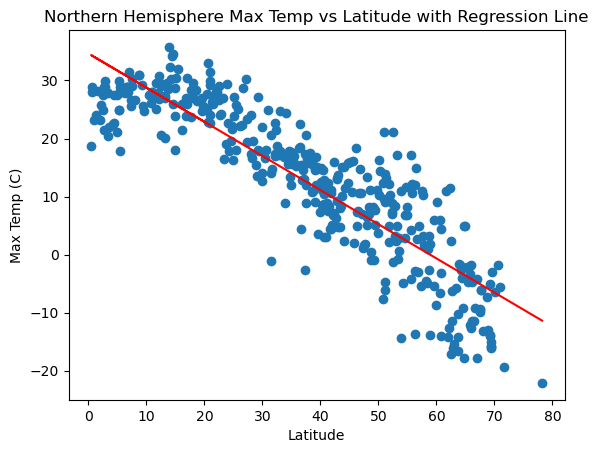

In [38]:
# Linear regression on Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_temp= northern_hemi_df["Max Temp"]
plt.scatter(x_value,y_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Northern Hemisphere Max Temp vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
correlation_coefficient=x_value.corr(y_temp)
plt.plot(x_value, slope* x_value +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")


Regression line equation: y= 0.35x + 28.90
The r-value is: 0.787064


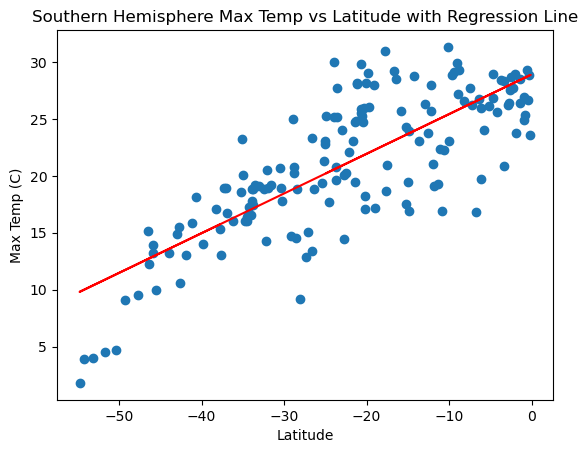

In [29]:
# Linear regression on Southern Hemisphere
x_temp= southern_hemi_df["Lat"]
y_temp= southern_hemi_df["Max Temp"]
plt.scatter(x_temp,y_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere Max Temp vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
correlation_coefficient=x_temp.corr(y_temp)
plt.plot(x_temp, slope* x_temp +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient: 2f}")

**Discussion about the linear relationship:** The Northern Hemisphere plot shows a moderate-strong negative correlation between max temperature and latitude. This means that as the latitude increases from the equator (latitude of 0), the max temperature decreases. The Southern Hemisphere plot shows a moderate-strong positive correlation betwen max temperature and latitude. Meaning, as the latitude increases to 0 (the equator) the max temperature of the cities also increase. This makes sense as the equator is the closest point to the sun and would be warmer. 

### Humidity vs. Latitude Linear Regression Plot

Regression line equation: y= 0.18x + 62.57
The r-value is:0.153857


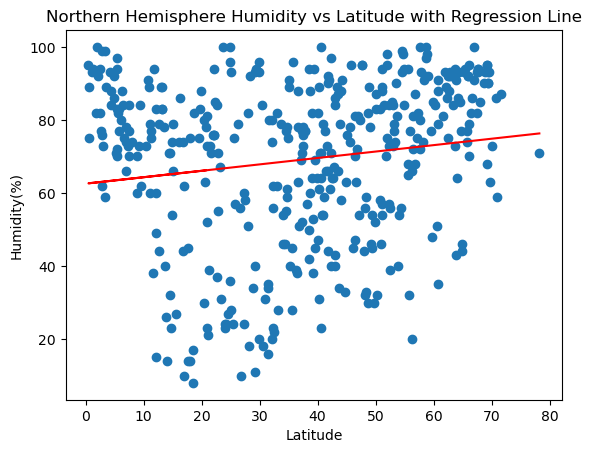

In [32]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_humidity= northern_hemi_df["Humidity"]
plt.scatter(x_value,y_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere Humidity vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
correlation_coefficient=x_value.corr(y_humidity)
plt.plot(x_value, slope* x_value +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

Regression line equation: y= 0.12x + 82.09
The r-value is:0.121134


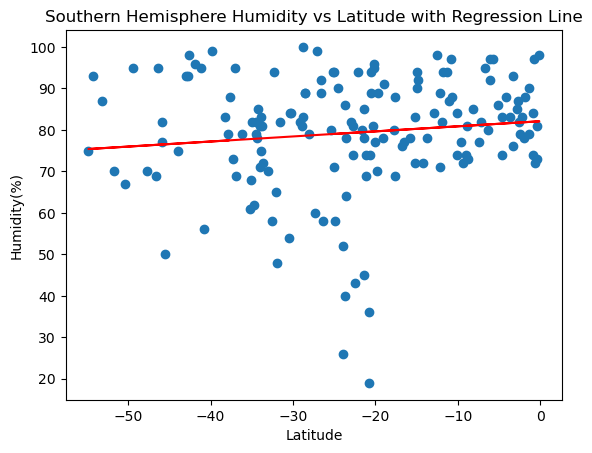

In [33]:
# Southern Hemisphere
x_value_south= southern_hemi_df["Lat"]
y_humidity_s= southern_hemi_df["Humidity"]
plt.scatter(x_value_south,y_humidity_s)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere Humidity vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(x_value_south,y_humidity_s)
correlation_coefficient=x_value_south.corr(y_humidity_s)
plt.plot(x_value_south, slope* x_value_south +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

**Discussion about the linear relationship:** The Northern Hemisphere Plot and Southern Hemisphere Plot both show a small/weak positive correction coefficient between latitude and percent humidity. However, the r value is small which means there are other factors that impact percent humidity outside of latitude and therefore a correlation between the two cannot be drawn. Some examples could be topography and proximity to bodies of water.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation: y= 0.08x + 57.53
The r-value is:0.037337


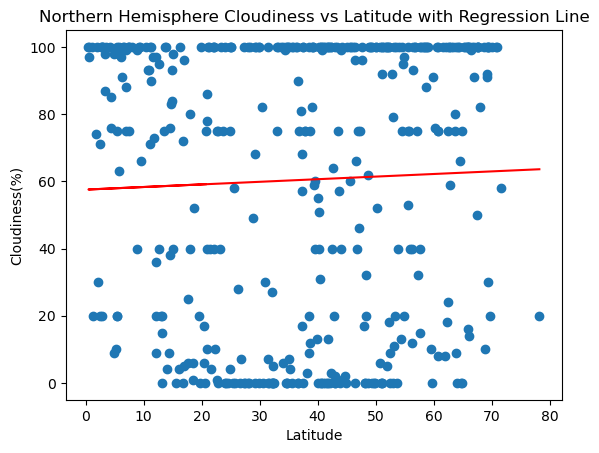

In [36]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_cloudiness_n= northern_hemi_df["Cloudiness"]
plt.scatter(x_value,y_cloudiness_n)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere Cloudiness vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(x_value, y_cloudiness_n)
correlation_coefficient=x_value.corr(y_cloudiness_n)
plt.plot(x_value, slope* x_value +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

Regression line equation: y= 0.38x + 73.36
The r-value is:0.134242


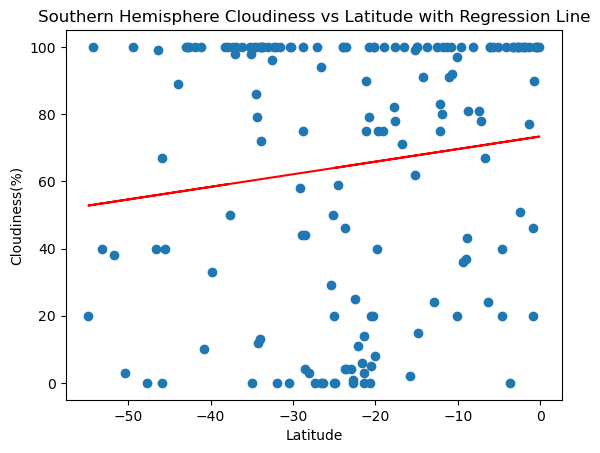

In [35]:
# Southern Hemisphere
x_value_south= southern_hemi_df["Lat"]
y_cloudiness_s= southern_hemi_df["Cloudiness"]
plt.scatter(x_value_south,y_cloudiness_s)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere Cloudiness vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(x_value_south,y_cloudiness_s)
correlation_coefficient=x_value_south.corr(y_cloudiness_s)
plt.plot(x_value_south, slope* x_value_south +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere plots show a very weak correction betwen latitude and cloudiness. This means there is no relationship between a City's latitude and the percent cloudiness. We can conclude that there are other factors outside of latitude that determine the percent cloudiness. Some factors can include humidity, temperature and air pressure. 

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation: y= 0.02x + 3.35
The r-value is:0.154115


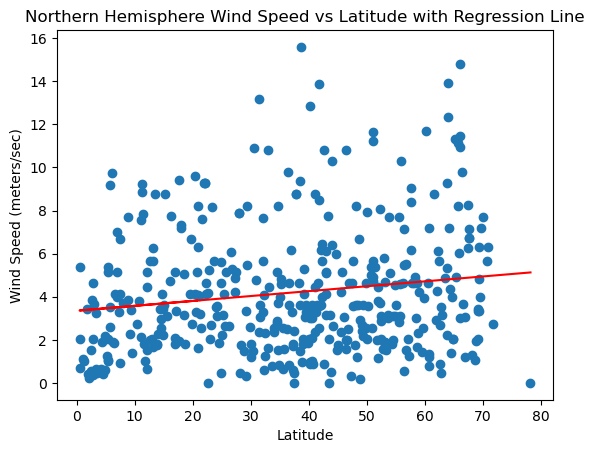

In [39]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_windspeed_n= northern_hemi_df["Wind Speed"]
plt.scatter(x_value,y_windspeed_n)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters/sec)")
plt.title("Northern Hemisphere Wind Speed vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(x_value, y_windspeed_n)
correlation_coefficient=x_value.corr(y_windspeed_n)
plt.plot(x_value, slope* x_value +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

Regression line equation: y=-0.05x + 2.30
The r-value is:-0.291070


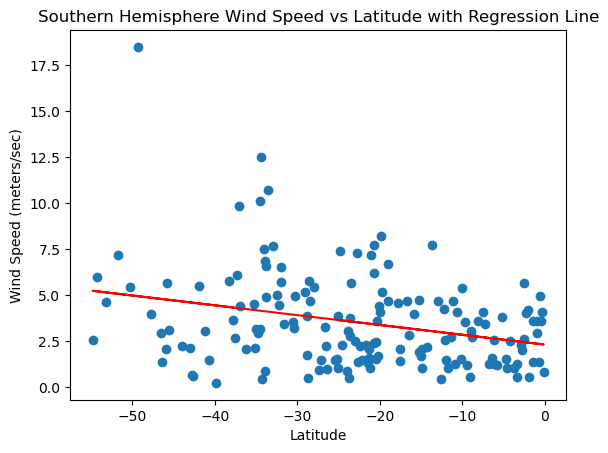

In [40]:
# Southern Hemisphere
x_value_south= southern_hemi_df["Lat"]
y_wind_speed_s= southern_hemi_df["Wind Speed"]
plt.scatter(x_value_south,y_wind_speed_s)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters/sec)")
plt.title("Southern Hemisphere Wind Speed vs Latitude with Regression Line")

slope, intercept, rvalue, p_value, std_err =linregress(x_value_south,y_wind_speed_s)
correlation_coefficient=x_value_south.corr(y_wind_speed_s)
plt.plot(x_value_south, slope* x_value_south +intercept,color="red")
print(f"Regression line equation: y={slope: .2f}x + {intercept:.2f}")
print(f"The r-value is:{correlation_coefficient:2f}")

**Discussion about the linear relationship:** The Northern Hemisphere plot shows a weak positive correlation. This means that although it can seem that wind speed increases as latitude increases, there is not a strong relationship between wind speed and latitude. The Southern Hemisphere plot shows a weak to moderate negative correlation. This means as the latitude increases towards the equator, the wind speed decreases. The relationships are weak meaning there are other factors that play a stronger role in determining wind speed that is not latitude. 